# Tarea 3. Midiendo rendimiento y riesgo.

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://www.maxpixel.net/static/photo/1x/Wall-Street-Dices-Over-Newspaper-Profit-Loss-Risk-2656028.jpg" width="600px" height="400px" />

**Resumen.**
> En esta tarea descargarás datos históricos de precios y, con base en ellos, calcularás rendimientos. Luego se te pedirá resumir la distribución de rendimientos para cada instrumento calculando el rendimiento medio y volatilidad. De igual manera, se te pedirá presentar dicho resumen en una base anual.

**Criterio de revisión.**
> Se te calificará de acuerdo a los resultados finales que reportes, basados en tu análisis.

**Antes de comenzar.**
> Por favor, copiar y pegar este archivo en otra ubicación. Antes de comenzar, nombrarlo *Tarea3_ApellidoNombre*, sin acentos y sin espacios; por ejemplo, en mi caso el archivo se llamaría *Tarea3_JimenezEsteban*. Resolver todos los puntos en dicho archivo y subir en este espacio.

## 1. Descarga de datos (20 puntos)

Descargar los precios diarios ajustados en el cierre para el índice S&P 500 (^GSPC), Microsoft (MSFT), Walgreens (WBA), y Tesla Motors (TSLA) durante el periodo comprendido del primero de enero del 2011 hasta el 31 de diciembre del 2015.

1. Mostrar el DataFrame de los precios diarios (10 puntos).
2. Graficar los precios (10 puntos).

In [1]:
import numpy as np
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web
def get_closes(tickers, start_date=None, end_date=None, freq=None):
    import pandas as pd
    pd.core.common.is_list_like = pd.api.types.is_list_like
    import pandas_datareader.data as web  
    closes = pd.DataFrame(columns = tickers, index=web.YahooDailyReader(symbols=tickers[0], start=start_date, end=end_date, interval=freq).read().index)   
    for ticker in tickers:
        df = web.YahooDailyReader(symbols=ticker, start=start_date, end=end_date, interval=freq).read()
        closes[ticker]=df['Adj Close']
    closes.index_name = 'Date'
    closes = closes.sort_index()
    return closes

In [2]:
ticker = ['^GSPC', 'MSFT', 'WBA', 'TSLA']
start = '2011-01-01'
end = '2015-12-31'
interval = 'd'
closes =get_closes(tickers=ticker, start_date=start, end_date=end, freq=interval)
closes.iloc[0:10,:]

^GSPC       MSFT        WBA       TSLA
Date                                                    
2011-01-03  1271.869995  22.912699  33.120098  26.620001
2011-01-04  1270.199951  23.002779  33.398075  26.670000
2011-01-05  1276.560059  22.929071  33.861340  26.830000
2011-01-06  1273.849976  23.600565  33.962425  27.879999
2011-01-07  1271.500000  23.420408  33.760262  28.240000
2011-01-10  1269.750000  23.109228  34.493088  28.450001
2011-01-11  1274.479980  23.019156  34.392010  26.959999
2011-01-12  1285.959961  23.379471  34.703655  26.959999
2011-01-13  1283.760010  23.084660  35.074276  26.219999
2011-01-14  1293.239990  23.174734  34.905807  25.750000

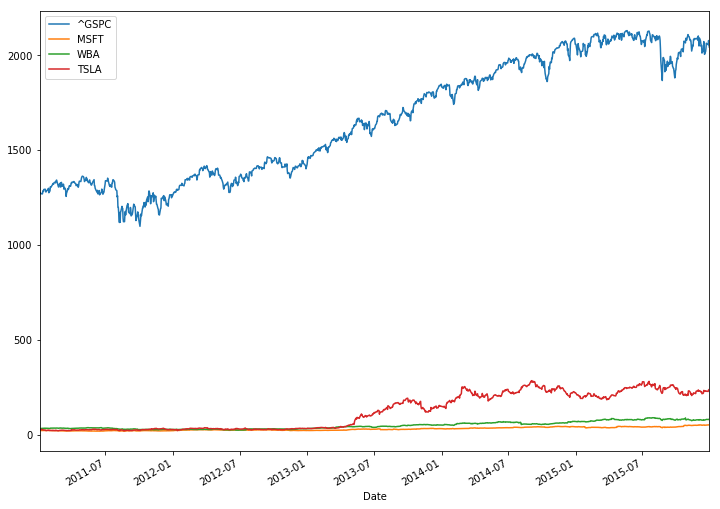

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
d = closes.plot(figsize=(12,9))


## 2. Cálculo de rendimientos diarios (20 puntos)

A partir de los precios que descargaste en el anterior punto, calcular los rendimientos porcentuales diarios.

1. Mostrar el DataFrame de los rendimientos porcentuales diarios (10 puntos).
2. Graficar los rendimientos (10 puntos).

In [4]:
porcentuales = ((closes - closes.shift())/(closes.shift())).dropna()
porcentuales.iloc[0:10,:]

^GSPC      MSFT       WBA      TSLA
Date                                              
2011-01-04 -0.001313  0.003931  0.008393  0.001878
2011-01-05  0.005007 -0.003204  0.013871  0.005999
2011-01-06 -0.002123  0.029286  0.002985  0.039135
2011-01-07 -0.001845 -0.007634 -0.005953  0.012913
2011-01-10 -0.001376 -0.013287  0.021707  0.007436
2011-01-11  0.003725 -0.003898 -0.002930 -0.052373
2011-01-12  0.009008  0.015653  0.009062  0.000000
2011-01-13 -0.001711 -0.012610  0.010680 -0.027448
2011-01-14  0.007385  0.003902 -0.004803 -0.017925
2011-01-18  0.001376  0.012721  0.012790 -0.004272

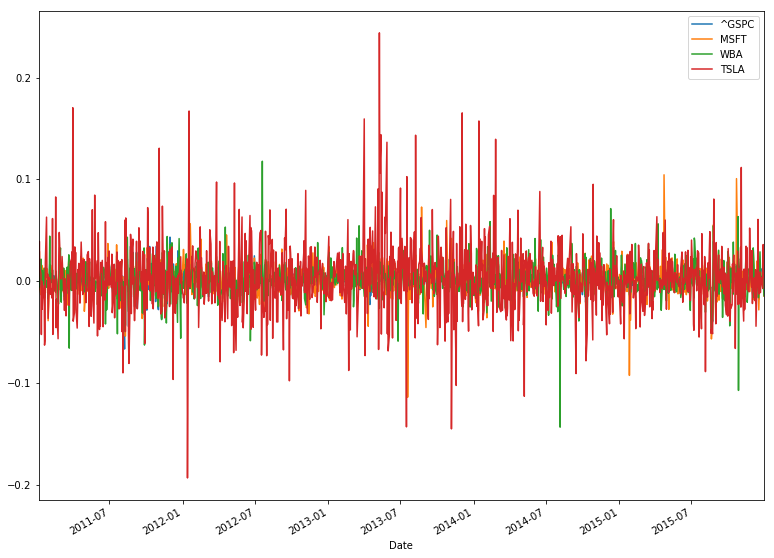

In [5]:
porcentuales.plot(figsize= (13,10));

## 3. Resumen de distribución de rendimientos (30 puntos)

Con base en los rendimientos que calculaste en el punto anterior:

1. Calcular el rendimiento medio diario para el índice S&P 500 y para los demás activos. Anualizar los rendimientos (15 puntos). 

2. Calcular la volatilidad diaria para el índice S&P 500 y para los demás activos. Anualizar (15 puntos).

Por favor, reportar los resultados en DataFrames tal y como lo vimos en clase.

In [6]:
def calculo_anual(retorno):
    return (1+retorno).groupby(lambda date: date.year).prod()-1

In [7]:
retorno_anual = calculo_anual(porcentuales)
retorno_anual

^GSPC      MSFT       WBA      TSLA
2011 -0.011220 -0.047546 -0.141398  0.072877
2012  0.134057  0.057989  0.152733  0.185924
2013  0.296012  0.442980  0.589405  3.441393
2014  0.113906  0.275646  0.359792  0.478495
2015 -0.007266  0.226919  0.136146  0.079133

In [8]:
retorno_anual.std()

^GSPC    0.126016
MSFT     0.191406
WBA      0.273022
TSLA     1.457093
dtype: float64

In [9]:
quiz2= pd.DataFrame(columns = ['Rendimiento'])
quiz2['Rendimiento'] = [.1,.2,4]
quiz2.std()

Rendimiento    2.223361
dtype: float64

In [10]:
renanu_desest = pd.DataFrame(columns= ticker, index= ['Rendimiento Medio Anual', 'Volatilidad'])
renanu_desest.loc['Rendimiento Medio Anual']= porcentuales.mean()*252
renanu_desest.loc['Volatilidad']= porcentuales.std()*(252**(.5))
renanu_desest

^GSPC      MSFT       WBA      TSLA
Rendimiento Medio Anual  0.107092  0.192464  0.211496  0.578548
Volatilidad              0.154583  0.234923  0.257905  0.527757

## 4. Gráfico rendimientos esperados vs. volatilidad (30 puntos)

Graficar los rendimientos medios anuales contra las desviaciones estándar del índice S&P 500 y de los demás activos. Como vimos en clase, la volatilidad debe ir en el eje $x$ y el rendimiento esperado en el eje $y$. Se deben etiquetar los ejes y dar detalles para un completo entendimiento de la gráfica.

1. Gráfico (10 puntos).
2. Ajuste una línea recta a los puntos obtenidos. Dar la ecuación (10 puntos).
3. A partir del gráfico y de la línea recta ajustada, concluya acerca de la relación rendimiento/riesgo (10 puntos).

*Nota:* el ajuste de la línea recta corresponde a una regresión lineal. Si no saben como hacerlo, por favor preguntar en asesoría.

-0.105796737033 1.28729376529


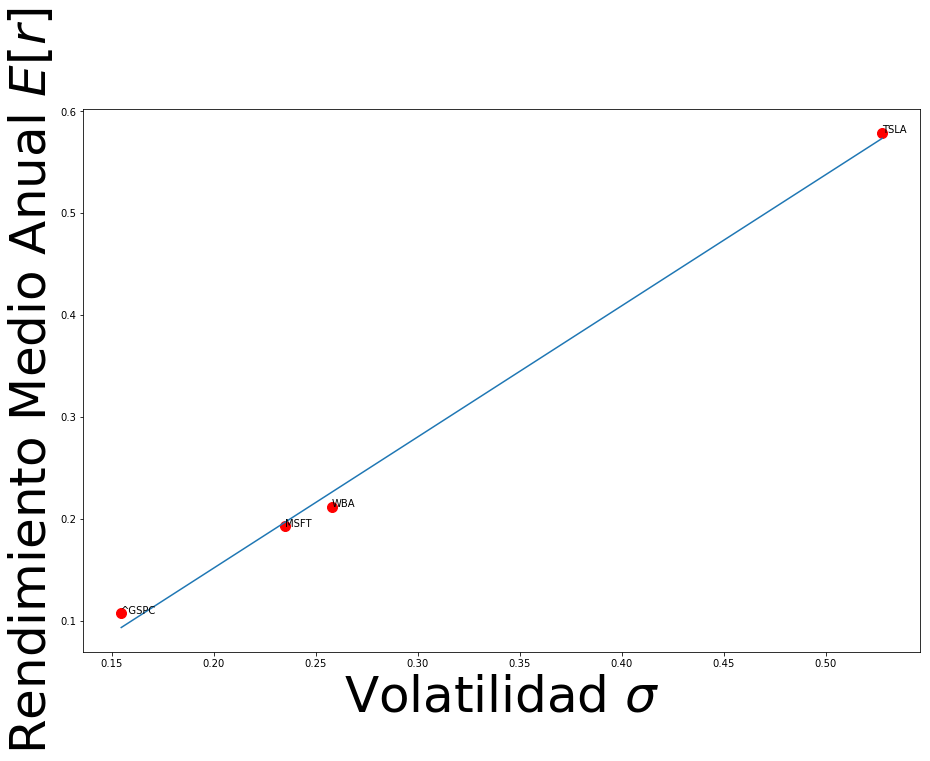

In [11]:
#Graficar los rendimientos medios anuales contra las desviaciones estándar del índice S&P 500 y de los demás activos. 
import scipy.optimize  as opt
x_points = renanu_desest.loc['Volatilidad'].values
y_points= renanu_desest.loc['Rendimiento Medio Anual'].values
plt.figure(figsize=(15,10))
plt.plot(x_points, y_points, 'ro', ms=10)
plt.xlabel('Volatilidad $\sigma$', size = 50)
plt.ylabel('Rendimiento Medio Anual $E[r]$', size = 50)
# Etiqueta de cada instrumento
for i in range(4):
    plt.text(x_points[i], y_points[i], ticker[i])
def objetivo(b,x,y):
    return np.sum((y-b[0]-b[1]*x)**2)

b0= [0,0]
res = opt.minimize(objetivo, b0, args=(x_points,y_points))
f,d= res.x[0],res.x[1]
print(f,d)
plt.plot(np.sort(x_points), res.x[0]+res.x[1]*np.sort(x_points))


## <font color = 'red'> Conclusión
- Para un rendimiento esperado más alto, se necesita asumir más riesgo.
- La relación entre rendimiento esperado y riesgo es positiva (de acuerdo a los datos).
- En los datos obtenidos se puede observar cierta relación, pues el riesgo y el rendimiento parecen seguir la misma dirección en distintas proporciones.
-Si se planea tener una inversión que no vea como prioridad el rendimiento, sino el abstenerse de una volatilidad alta recomendaría dejar fuera las acciones de TESLA para un rendimiento-volatilidad más ordinario.
- La incertidumbre(riesgo) disminuiría considerablamente si se tomarán dichos activos para formar un portafolio, y  en base a ello se tomasen los portafolios superiores (Ofrecen mayor rendimiento con un riesgo similar a otro portafolio). Sin embargo, si se planea tener una inversión que no vea como prioridad el rendimiento, sino el abstenerse de una volatilidad alta recomendaría dejar fuera del portafolio las acciones de TESLA. 